# Сборный проект. Анализи предсказание продаж по компьютерным играм

## Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Датафрейм имеет следующую структуру:

*  Name — название игры
*  Platform — платформа
*  Year_of_Release — год выпуска
*  Genre — жанр игры
*  NA_sales — продажи в Северной Америке (миллионы проданных копий)
*  EU_sales — продажи в Европе (миллионы проданных копий)
*  JP_sales — продажи в Японии (миллионы проданных копий)
*  Other_sales — продажи в других странах (миллионы проданных копий)
*  Critic_Score — оценка критиков (максимум 100)
*  User_Score — оценка пользователей (максимум 10)
*  Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


## План работы над проектом:
1. Просмотреть таблицу и выявить аномалии и пропущенные значения.
2. Провести предобработку таблицы: замена столбцов, заполнение пропусков, удаление дубликатов и т.д.
3. Провести анализ по данным и подготовить актуальные данные.
4. Составить портреты пользователей для купных регионов продаж.
5. Выполнить проверку гипотез.
6. Оформить проект и сделать выводы по каждому шагу.

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://sm.ign.com/t/ign_pt/screenshot/default/b-9vmr-wwam2heb_2kkd.1200.jpg", width=500, height=100)

_Практически все в мире когда-нибудь интересовались компьютерными играми. У каждого есть свои предпочтения по жанру, вкусу той или иной платформе игр. Мы работаем в интернет-магазине "Стримчик", которая продает компьютерные игры по всему миру. Из открытых источников, мы взяли исторические данные, которые помогут сделать анализ и провести исследование, и запланировать успешную продажу игр на 2017 год. Для достижения цели мы изучим оценки пользователей, и критиков, жанры и платформы за несколько лет. Основная задача состоит в том, чтобы выявить инетересные закономерности определяющие успешную продажу игр._

## Работа с таблицей и поиск аномалий

### Загрузка данных games

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import numpy as np
from scipy import stats as st

In [3]:
games = pd.read_csv('/datasets/games.csv')#прочитаем файл
games.head()#выведем первые 5 строчек датафрейма

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.info()#выведим основную информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


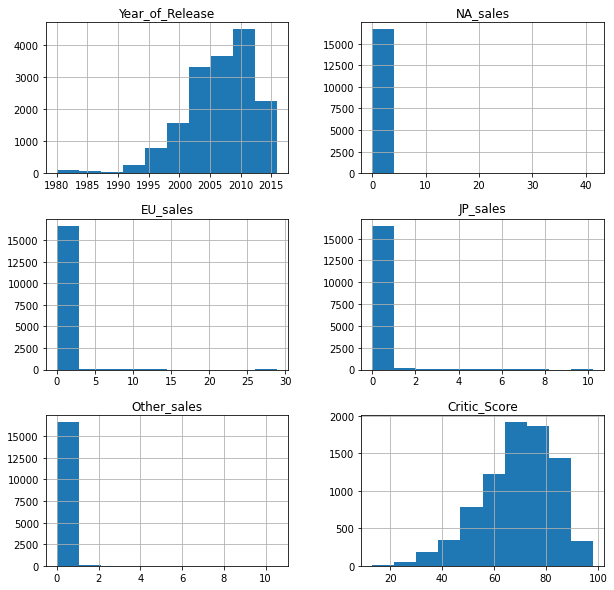

In [5]:
games.hist(figsize=(10, 10));#построим гистограмму для численных толбцов

__Комментарии:__ Нам даны данные 11 столбцов содержащие числовые и строковые данные, названия игр по жанрам и платформам, критериям оценок пользователей и критиков, а также рейтинг ESRB. Значения имеют большой временной диапазон, разбитый по продажам стран Европы, Северной Америке, Японии и других стран.

#### Замена названий столбцов

__Комментарии:__ Приведем столбцы к единому нижнему регистру, это поможет нам найти дубликаты.

In [6]:
games.columns = games.columns.str.lower()#приведем к нижнему регистру все столбцы
print(games.columns)#проверим и выведим на экран столбцы

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [7]:
games.duplicated().sum()#выведим на экран количество строк дубликатов в данных

0

#### Преобразование данных в нужные типы

__Комментарии:__ Не будем преобразовывать стоблцы продаж в Северной Америке, Европе, Японии и других странах, миллионы проданных копий, при переводе, значительно теряются данные. Такие столбцы как "name", "platform", "genre", "rating" содержат тип object. Столбец "year_of_release" содержит пропущенные значения, поэтому год выпуска содержит тип float. Обработаем пропущенные значения в нем и переведем в тип дату. Также переведем значения столбца "user_score" в тип float.

#### Обработака пропусков.

In [8]:
games.isna().mean().round(4).to_frame().sort_values(by=0).style.format('{:.2%}').background_gradient('coolwarm')#выводим количество пропущенных значений для каждого столбца

,0
platform,0.00%
na_sales,0.00%
eu_sales,0.00%
jp_sales,0.00%
other_sales,0.00%
name,0.01%
genre,0.01%
year_of_release,1.61%
user_score,40.09%
rating,40.48%


___Комментари:___ В 6 столбцах пропущенные значения. В столбцах "name", "genre" менее 0,1% поэтому пропуски удалим. Столбец "year_of_release" содержит пропуски в размере 2% мы его переведем в дату. Cтолбцы "user_score", "critic_score" не будем заполнять. По этим столбцам идут практически одинаковые строчки в пропусках, возможно эту игру не удалось оценить, возможно не сложилось оценить возврастную группу, а возможно эти игры не продавали в данный период, поэтому образовались пропуски.

In [9]:
games['year_of_release']= pd.to_datetime(games['year_of_release'], format='%Y')#перведем формат в дату

In [10]:
games = games.dropna(subset=['name']).reset_index(drop=True)#удаляем 2 строки с пропусками
games['rating'] = games['rating'].fillna(value='uknow')#хаполним пустые значения строковым значением

___Комментарии:___ Проверим уникальные значения столбца с оценкой пользователей. При необходимости обработаем.

In [11]:
games['user_score'].unique()#посмотрим на уникальные значения столбца оценка пользователей

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [12]:
tbd = games.query('user_score=="tbd"')#сделаем срез с данными tbd и посчитаем количество таких значений
print(len(tbd))

2424


__Комментарии:__ Значение tbd  сокращение от To Be Determined (от анг. будет определено). Служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований. Значит количество пропусков 2424, и это 24% от общего количества значений в этом столбце. Это значительный процент, поэтому, чтобы не искозить данные заменим значения на nan и потом переведм столбец в float.

In [13]:
games['user_score'] = games['user_score'].replace("tbd", np.nan).astype(float)#заменим значения на NaN
games['user_score'].unique()#проверим уникальные значения столбца

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [14]:
games.info()#проверим что столбцы перевелись

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16713 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16713 non-null  float64       
 5   eu_sales         16713 non-null  float64       
 6   jp_sales         16713 non-null  float64       
 7   other_sales      16713 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           16713 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


In [15]:
games.isna().sum()#проверим наличе пропусков

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

__Комментарии:__ Пропуски в столбце "year_of_release" не все отработались, возможно потому что такое название игры уникально и в годе выпуска его не было. По крайней мере их осталось не значительно. 

__Комментарии:__ Создадим столбец total sales в котором запишем суммарные продажи во всех регионах.

In [16]:
games['total_sales'] = games[['na_sales', 'eu_sales','jp_sales']].sum(axis=1)#суммируем столбцы
print(games['total_sales'].head())#выведим 5 строк нового столбца

0    74.09
1    39.47
2    32.23
3    29.82
4    30.38
Name: total_sales, dtype: float64


### Проведение исследовательского анализа

#### Жизненный цикл игры

Text(0.5, 1.0, 'Выпуск игр по годам')

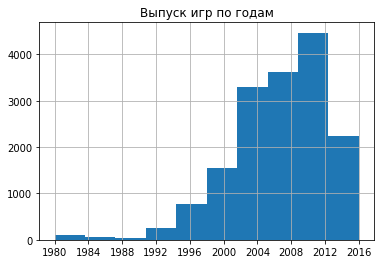

In [17]:
games['year_of_release'].hist();#построим гистограмму
plt.title('Выпуск игр по годам')

__Комментарии:__ Основной пик приходится на выпуск игр в 2009-2010 годах, производство игр сокращается в 2006-2008 годах. Ниже идет 2004 год, затем 2016 год. Хотя казалось бы возможностей в плане технологий в 2016 году больше, по сравнению с остальными годами.

In [18]:
games.year_of_release.value_counts().to_frame()#отсортируем и откампануем фрейм по годам

,year_of_release
2008-01-01,1427
2009-01-01,1426
2010-01-01,1255
2007-01-01,1197
2011-01-01,1136
2006-01-01,1006
2005-01-01,939
2002-01-01,829
2003-01-01,775
2004-01-01,762


___Комментарии:___ Основной выпуск игр пришелся на 2008г.- 1440шт (9%), 2009г.- 1431 шт.(9%), 2010г.- 1271шт.(7%), 2007г.- 1202шт.(7%), 2011 - 1153шт.(7%), 2006г.- 1020шт.(6%), 2005г. - 947шт.(6%), 2002г.-845шт.(5%). Остальной наименьший выпуск игр менее 5% - 2012г.,2015г., 2014г., 2013г., 2001г. и менее. Для анализа данных стоит учитывать годы от 2000г. до 2016г., так как на 1999г. приходится производство игр около 2% и ниже соответсвенно до 1980г.

#### Изменение продаж по платформам

In [19]:
games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)#сгруппируем данные по платформам в зависимости от суммы проданных копий

platform
PS2     1062.33
X360     885.66
Wii      828.44
PS3      803.97
DS       746.86
PS       689.95
GBA      310.12
PS4      265.79
PSP      252.63
XB       249.02
GB       247.26
NES      245.74
3DS      245.64
PC       237.14
N64      214.30
SNES     196.82
GC       193.75
XOne     145.05
2600      96.07
WiiU      76.24
PSV       47.61
SAT       33.52
GEN       27.46
DC        15.68
SCD        1.81
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

___Комментарии:___ Самые большие продажи копий игр по следующим платформам: PS2, X360, Wii, PS3, DS, PS, GBA, PS4, PSP, XB, GB, NES, 3DS.

In [20]:
games.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')#построим сводную таблицу чтобы посмотреть как менялось по годам продажа игр

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980-01-01,11.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-01,35.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-01-01,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-01-01,5.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-01-01,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-01-01,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-01-01,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-01-01,1.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988-01-01,0.73,NaN,NaN,NaN,NaN,1.40,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
pd.pivot_table(games, index='platform', values='year_of_release', aggfunc=pd.Series.nunique)
#сделаем сводную таблицу в зависимости от платформы и посчитаем уникальные значения по годам

,year_of_release
platform,
2600,10
3DO,2
3DS,6
DC,7
DS,11
GB,13
GBA,8
GC,7
GEN,5


___Комментарии:___ По таблице видно, что когда игра появляется в продаже, то ее продолжительность интереса клиентов от 4 до 10 лет, затем, появляется новая игра, видимо более усовершенственная версия и тогда отпадает необходимость в старой версии, и проявляется интерес к новой, лидерство переходит к более новой версии. В среднем платформа проживала свой цикл 6-10 лет. Самая продолжительная платформа PC - 26лет, а самая минимальная TG16, PCFX, GG всего 1 год. и Так как платформ много, и возможно они по разным направлениям лучше взять более актуальные продажи по годам.

In [22]:
games.platform.value_counts().to_frame()#отсортируем и откампануем фрейм по платформам

,platform
PS2,2161
DS,2151
PS3,1331
Wii,1320
X360,1262
PSP,1209
PS,1197
PC,974
XB,824
GBA,822


___Комментарии:__  Наибольшее число игр на платформе PS2 - 13%, DS - 13%, PS3 - 8%, Wii - 8%, X360 - 7%, PSP - 7%, PS - 7%, PC - 5%, XB - 5%, GBA - 5% и менее 3% остальные платформы. Запишем наиболее большие платформы вес которых от 13% до 5% во фрейм, чтобы построить по ним график. 

In [23]:
big_platform = games.query('platform==["PS2","DS", "PS3", "Wii", "X360", "PSP", "PS", "PC", "XB", "GBA"]')
#сделаем срез по самым большим платформам

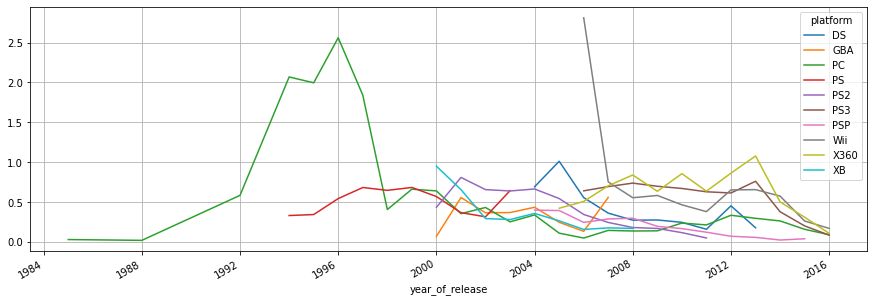

In [24]:
(
    big_platform
    .pivot_table(index='year_of_release', columns= 'platform', values='total_sales')
    .plot(grid=True, figsize=(15,5))
);#построим график распределения от общей стоимости самых больших платформ по годам

___Комментарии:__ По графику видно что самые высокие продажи по платформе PC в 1996г., чуть менее в 1995г., 1997г., в 1998г. было снижение до 49 млн. проданных копий, затем в 1999г. был небольшой скачок и в целом до 2014г. Остальные платформы начинались в основном с 2000г. до 2016г. волнообразно до 1 млн.игр, но есть и высокая продажа PS3 в 2006г. и резкое падение в 2008г. В среднем по платформам первые 2 года рост по продажам игр, потом идет падение, затем ситуация повторяется.Возьмем самые популярные платформы и построим по каждой платформе распределение по годам.

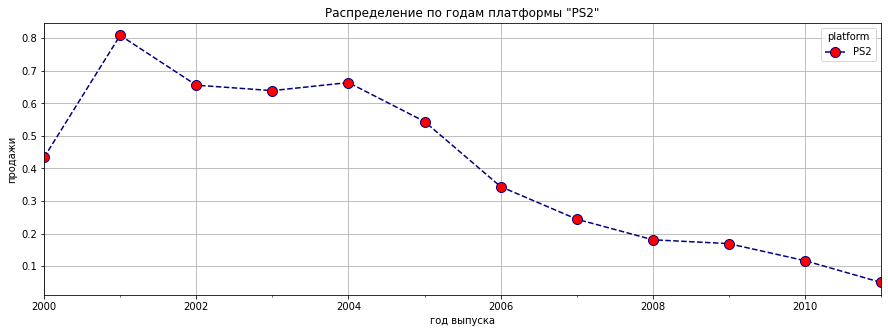

In [25]:
(
    games.query('platform=="PS2"')
    .pivot_table(index='year_of_release', columns= 'platform', values='total_sales')
    .plot(grid=True, figsize=(15,5), style='o-', color='navy', linestyle='dashed',\
          markerfacecolor='red',markersize=10)
)#сделаем срез по платформе и в сводной таблице укажим столбцы, по которым построим график
plt.title('Распределение по годам платформы "PS2"')
plt.xlabel('год выпуска')
plt.ylabel('продажи');

___Комментарии:___ По платформе PS2 мы видим пик продаж с 2001г. по 2004 г., потом идет снижение до 2011 г. Жизненный цикл платформы 12 лет.

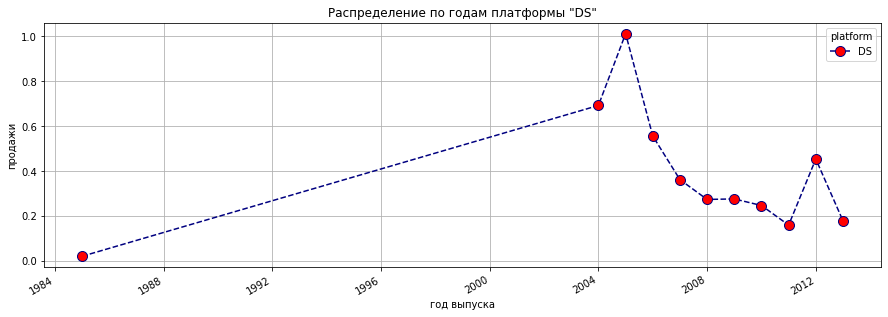

In [26]:
(
    games.query('platform=="DS"')
    .pivot_table(index='year_of_release', columns= 'platform', values='total_sales')
    .plot(grid=True, figsize=(15,5), style='o-', color='navy', linestyle='dashed',\
          markerfacecolor='red',markersize=10)
)#сделаем срез по платформе и в сводной таблице укажим столбцы, по которым построим график
plt.title('Распределение по годам платформы "DS"')
plt.xlabel('год выпуска')
plt.ylabel('продажи');

___Комментарии:___ По платформе DS большой пик в 2005 г.и потом спад продаж до 2011г., а также скачок в 2013г. Жизненный цикл платформы с 1985г. по 2013г. 28 лет.

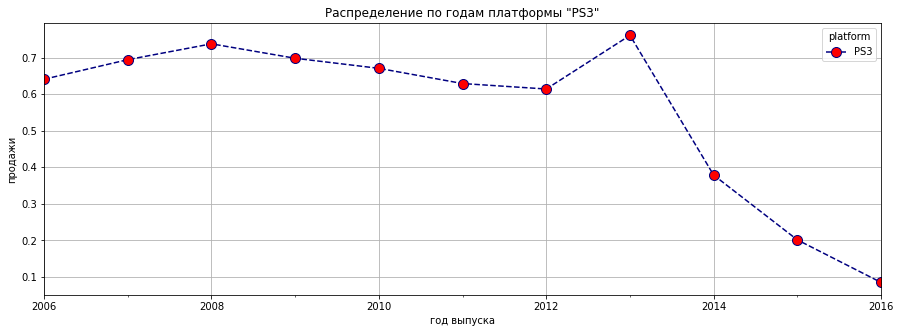

In [27]:
(
    games.query('platform=="PS3"')
    .pivot_table(index='year_of_release', columns= 'platform', values='total_sales')
    .plot(grid=True, figsize=(15,5), style='o-', color='navy', linestyle='dashed',\
          markerfacecolor='red',markersize=10)
)#сделаем срез по платформе и в сводной таблице укажим столбцы, по которым построим график
plt.title('Распределение по годам платформы "PS3"')
plt.xlabel('год выпуска')
plt.ylabel('продажи');

___Комментарии:___ По платформе PS3 мы видим высокие продажи сначала существования платформы с 2006г. по 2013г., затем идет спад до 2016г. Жизненный цикл платформы 10 лет.

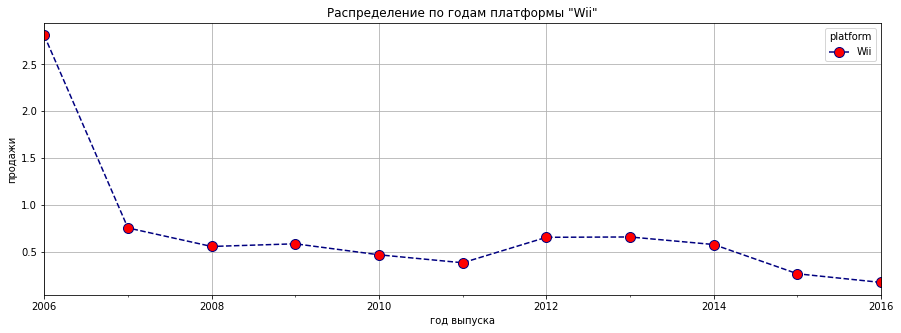

In [28]:
(
    games.query('platform=="Wii"')
    .pivot_table(index='year_of_release', columns= 'platform', values='total_sales')
    .plot(grid=True, figsize=(15,5), style='o-', color='navy', linestyle='dashed',\
          markerfacecolor='red',markersize=10)
)#сделаем срез по платформе и в сводной таблице укажим столбцы, по которым построим график
plt.title('Распределение по годам платформы "Wii"')
plt.xlabel('год выпуска')
plt.ylabel('продажи');

___Комментарии:___ По платформе Wii мы видим при выпуске высокие продажи с 2006г. по 2007г. и затем резкий спад до 0,7 млн.копий игр, и практически до 2016 г. происходили равномерные продажи. Жизненный цикл платформы 10 лет. 

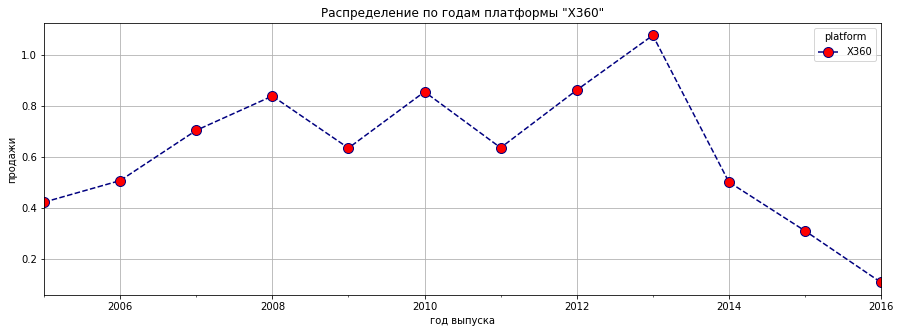

In [29]:
(
    games.query('platform=="X360"')
    .pivot_table(index='year_of_release', columns= 'platform', values='total_sales')
    .plot(grid=True, figsize=(15,5), style='o-', color='navy', linestyle='dashed',\
          markerfacecolor='red',markersize=10)
)#сделаем срез по платформе и в сводной таблице укажим столбцы, по которым построим график
plt.title('Распределение по годам платформы "X360"')
plt.xlabel('год выпуска')
plt.ylabel('продажи');

___Комментарии:___ По платформе X360 продажи выше среднего, большой пик продаж вырос в 2013г., затем начал падать до 2016г. Жизненный цикл платформы 11 лет.

#### Актуальный период.

___Комментарии:__ Как мы могли заметить из анализа выше, в среднем платформы живут около 9-10 лет, а рост продаж и их пик приходятся на первую половину срока жизни (3-4 года). Мы проанализировали продажи самых больших платформ по годам и выявили пики продаж, в среднем аналогичныx для других периодов этих платформ, эти данные помогут построить прогноз на 2017 год. Для дальнейшего анализа возьмем годы с 2013 по 2015.

In [30]:
data_3 = games.query('year_of_release>2012 and year_of_release<2016')#создадим датасет по 3 годам

#### Лидирующие платформы

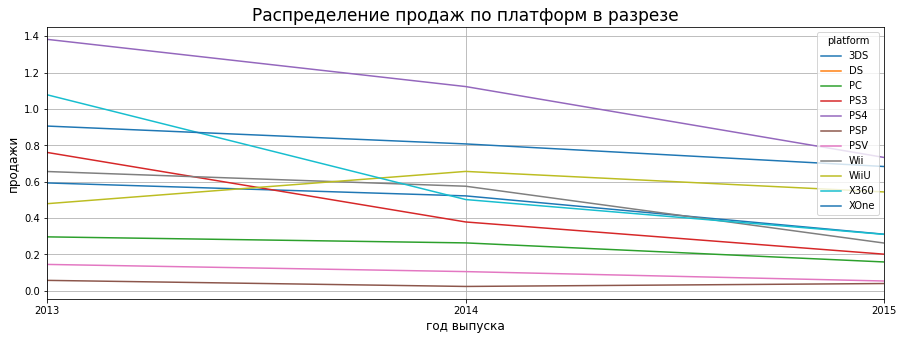

In [31]:
(
    data_3
    .pivot_table(index='year_of_release', columns= 'platform', values='total_sales')
    .plot(grid=True, figsize=(15,5))
);#построим график распределения по платформам в разрезе

plt.title('Распределение продаж по платформ в разрезе', size=17)
plt.xlabel('год выпуска',size=12)
plt.ylabel('продажи', size=12);

In [32]:
table = data_3.pivot_table(index='platform', values='total_sales', aggfunc=('count','mean')).sort_values(by='count',ascending=False).head(10)
#сделаем сводную таблицу по платформам и посчитаем количество игр, среднюю стоимость и отсортируем в порядке убывания
display(table)
print('Платформа с низкой продаваемостью:', table.query('mean == mean.min()'))
print('Платформа с самой высокой продаваемостью:', table.query('mean == mean.max()'))

,count,mean
platform,,
PS3,307,0.493257
PSV,273,0.093883
3DS,257,0.476537
PS4,228,0.906930
X360,173,0.712659
XOne,160,0.757125
PC,135,0.233926
WiiU,101,0.551386
PSP,67,0.051642


Платформа с низкой продаваемостью:           count      mean
platform                 
PSP          67  0.051642
Платформа с самой высокой продаваемостью:           count     mean
platform                
PS4         228  0.90693


___Комментарии:___ PS4 при появлении на рынке в 2014г. заняла самую высокую позицию 1,4 млн.копий, но затем резко начало падать до 2016г., видимо была качественная реклама новой версии игр, поэтому такой пик. По платформе X0ne пик приходился в 2013г. 0,6 млн. игр, затем медленное падение до 0,3 млн. в 2015г. и 0,3 млн. игр в 2015г. Рядом с лидирующими платформами приходится платформа X360, 1,1 млн. копий, но затем в 2014г. произошло падение продаж до 0,5 млн. игр, и к 2015г. падение до 0,3 млн. игр. Платформа Wii получила рост продаж в 2014г. до 0,7 млн. игр, но потом небольшой спад в 2015г. до 0,5 млн. игр и 2013г. до 0,3 млн. игр равномерно убавлялась. Платформа WiiU провела рост продаж в 2014г. до 0,7 млн. игр, затем произошло падение до 0,5 млн.игр в 2015г.Платформа PS3 в 2013г. получила пик продаж 0,8 млн. игр в 2013г., затем падение до 0,4 млн.игр в 2014г.далее падение до 2015г. 3DS получила пик продаж в 2013г. 0,9 млн. игр до 0,8 млн. игр в 2014г. и 0,7 млн. игр в 2015г. В основном мы видим у всех платформ одинаковую картину, первые 2 года в среднем идут равномерные продажи, с небольшими пиками, затем они падают. Для потенциально прибыльных платформ выберим: PS4 и  XOne.

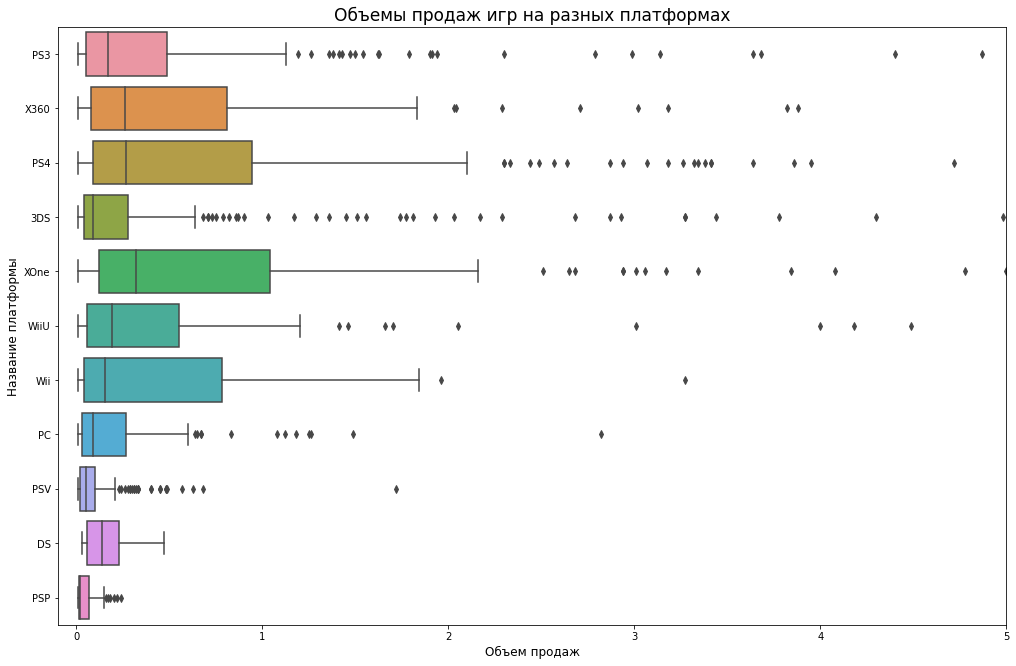

In [33]:
plt.figure(figsize=(17, 11))
sns.boxplot(data=data_3, y='platform', x='total_sales')
plt.xlim(-0.1, 5)


plt.title('Объемы продаж игр на разных платформах', size=17)
plt.xlabel('Объем продаж', size=12)
plt.ylabel('Название платформы', size=12)

plt.show()

___Комментарии:___ Можно увидеть что большая часть значений лежит до 1,1 млн.проданных игр. Только два уса простирается вправо от границ ящика на расстоянии до 2,2 млн.продаж по платформам XOne и PS4. За пределами правого  уса PS4 и XOne мы видим выбросы, таких выбросов очень много. Также по платформе 3DS есть выбросы, которые простираются до 5 млн. игр. Видимо на этих платформах клиенты были очень заинтересованы в покупках новых игр. По платформе X360 были выбросы с 1,9 млн.игр. до 4 млн. игр.

#### Влияние на продажи внутри одной платформы

In [35]:
ps4 = data_3.query('platform=="PS4"')#сделаем срез и запишем во фрейм самую популярную платформу

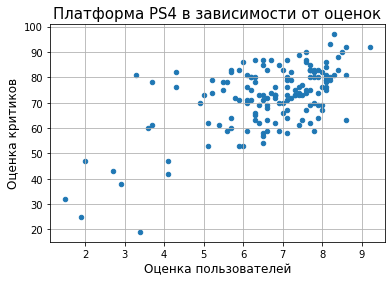

In [36]:
ps4.plot(x='user_score', y='critic_score', kind='scatter', grid=True)#построим график рассеяния

plt.title('Платформа PS4 в зависимости от оценок', size=15)
plt.xlabel('Оценка пользователей', size=12)
plt.ylabel('Оценка критиков', size=12)

plt.show()

In [37]:
print('Коэффициент корреляции от отзывов:', ps4['user_score'].corr(ps4['critic_score']))#рассчитаем коэффициент корреляции Пирсона

Коэффициент корреляции от отзывов: 0.61245091268124


___Комментарии:___ Видно, что есть средняя положительная корреляция. В основном баллы по отзавам высокие, что от критиков, что и от пользователей, диапазон от 50 до 90 и от 5 до 8 баллов соответственно.

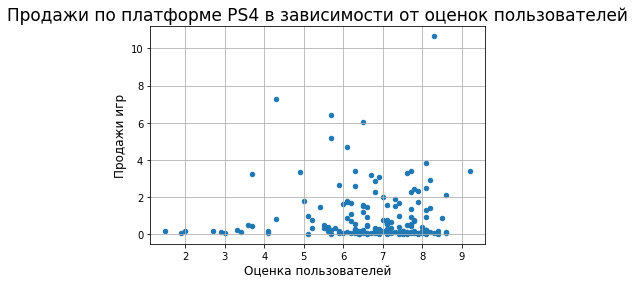

In [38]:
ps4.plot(x='user_score', y='total_sales', kind='scatter', grid=True);#построим график рассеяния

plt.title('Продажи по платформе PS4 в зависимости от оценок пользователей', size=17)
plt.xlabel('Оценка пользователей', size=12)
plt.ylabel('Продажи игр', size=12)

plt.show()

In [39]:
print('Коэффициент корреляции продаж от отзывов пользователя ps4:', ps4['user_score'].corr(ps4['total_sales']))#рассчитаем коэффициент корреляции Пирсона

Коэффициент корреляции продаж от отзывов пользователя ps4: 0.024648811651093814


___Комментарии:__ На графике мы видим отсутсвие корреляции, т.е. нет зависимости между отзывами пользователей и продажами.

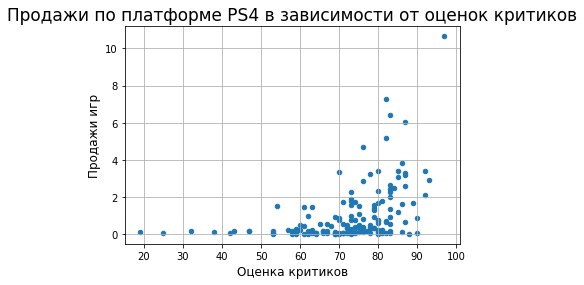

In [40]:
ps4.plot(x='critic_score', y='total_sales', kind='scatter', grid=True);#построим график рассеяния
plt.title('Продажи по платформе PS4 в зависимости от оценок критиков', size=17)
plt.xlabel('Оценка критиков', size=12)
plt.ylabel('Продажи игр', size=12)

plt.show()

In [41]:
print('Коэффициент корреляции продаж от отзывов критиков ps4:', ps4['critic_score'].corr(ps4['total_sales']))#рассчитаем коэффициент корреляции Пирсона

Коэффициент корреляции продаж от отзывов критиков ps4: 0.431124392239198


___Комментарии:__ По отзывам критиков и продаж мы наблюдаем слабую положительную зависимость. Структура данных сосредоточена до 4 млн.продаж, но есть и несколько точек от 4 млн.игр и они показывают сильную зависимость от отзывов критиков.

__Выводы:__ Есть закономерность по платформе PS4 в зависимости от продаж по оценкам критиков, хоть и слабая, а так же в пересечении оценки пользователей и критиков.

#### Обобщение результатов

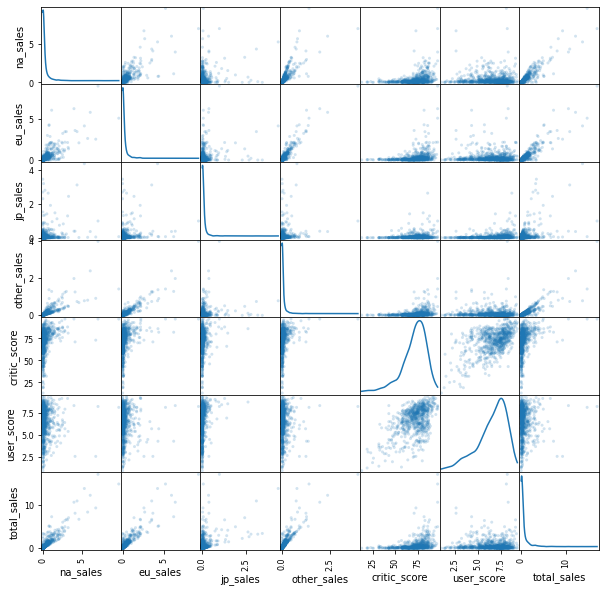

In [42]:
scatter_matrix(data_3, alpha=0.2, figsize=(10, 10), diagonal="kde");#построим матрицу диаграмм рассеяния

In [43]:
print('Коэффициент корреляции по отзывам пользователя и продажам:', data_3['user_score'].corr(data_3['total_sales']))#рассчитаем коэффициент корреляции Пирсона
print('Коэффициент корреляции по отзывам критиков и продажам:', data_3['critic_score'].corr(data_3['total_sales']))#рассчитаем коэффициент корреляции Пирсона
print('Коэффициент корреляции от отзывов пользователей и критиков:', data_3['user_score'].corr(data_3['critic_score']))#рассчитаем коэффициент корреляции Пирсона

Коэффициент корреляции по отзывам пользователя и продажам: 0.008361362509390652
Коэффициент корреляции по отзывам критиков и продажам: 0.3346914363392673
Коэффициент корреляции от отзывов пользователей и критиков: 0.5198644842255363


___Комментарии:___ По диаграмме рассеяния мы выидим среднюю зависимость от оценки пользователей и критиков по общим платформам, тоже самое что мы видили по отдельной платформе PS4. Диаграмма рассеяния от отзывов пользователей и продаж тоже лежит почти горизонтально, следовательно нет зависимости. А вот по оценке пользователей в зависимости от продаж видим такую же корреляцию общих платформ как и по платформе PS4 - слабая положительная зависимость. Можно сделать вывод что оценка критиков влияет на продажи игр по всем платформам, так же оценки критиков и пользователей зависят друг от друга.

#### Прибыльные жанры

In [44]:
genre_df = data_3.pivot_table(
    index='genre',\
    values='total_sales',\
    aggfunc=('count', 'mean')\
).reset_index().sort_values(by='count',ascending=False)
display(genre_df.head(10))#сделаем сводную таблицу по жанрам и посчитаем средние продажи

print('Жанр с самыми низкими продажами:', genre_df.query('mean == mean.min()'))#выведим минимальные жанры
print('Жанр с самыми высокими продажами:', genre_df.query('mean == mean.max()'))#выведим максимальные жанры

,genre,count,mean
0,Action,588,0.438146
7,Role-Playing,238,0.494244
1,Adventure,189,0.093968
10,Sports,166,0.667048
8,Shooter,140,1.221500
3,Misc,123,0.441220
2,Fighting,64,0.434688
6,Racing,61,0.540000
4,Platform,59,0.605424
9,Simulation,44,0.421364


Жанр с самыми низкими продажами:        genre  count      mean
1  Adventure    189  0.093968
Жанр с самыми высокими продажами:      genre  count    mean
8  Shooter    140  1.2215


___Комментарии:___ Самое большое количество игр по жанру "Action" 588 игр или 35%, затем "Role-Playing" 238 игр или 14%, "Adventure" 189 игр или 11%, "Sports" 166 игр или 10%, "Shooter" 140 игр или 8%, "Misc" 123 игры или 7%, "Fighting" 65 игр или 4% и менее. Самые прибыльные игры с жанром "Shooter" 1,22 млн.проданных копий и "Platform" 0,60 млн.проданных копий. Жанр с самыми низкими продажами: "Adventure" 0.09 млн. проданных копий.

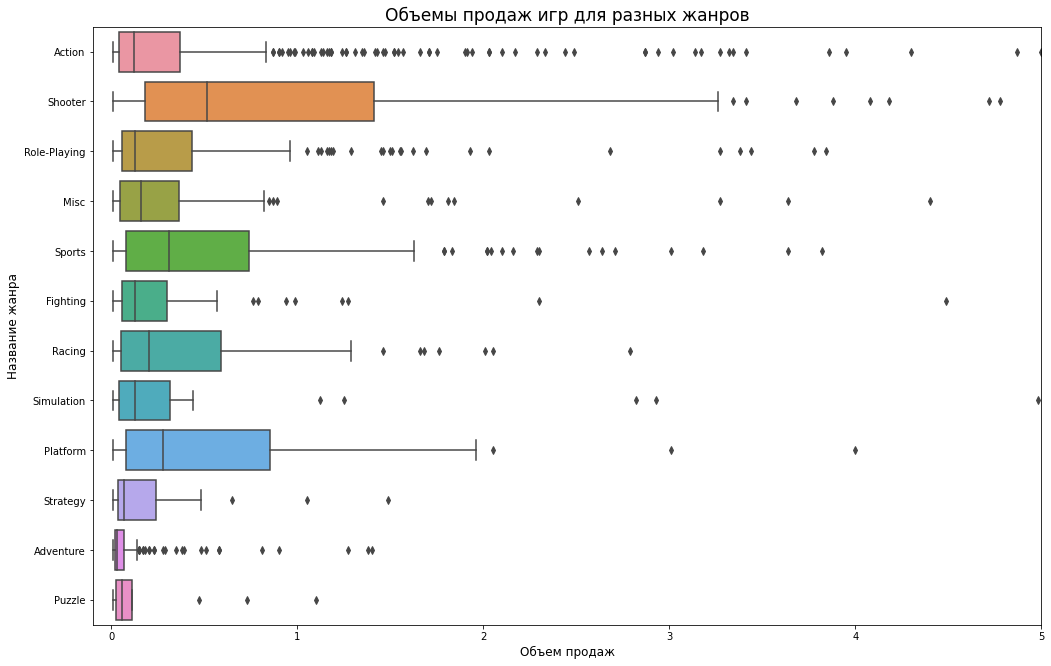

In [45]:
plt.figure(figsize=(17, 11))
sns.boxplot(data=data_3, y='genre', x='total_sales')
plt.xlim(-0.1, 5)

plt.title('Объемы продаж игр для разных жанров', size=17)
plt.xlabel('Объем продаж', size=12)
plt.ylabel('Название жанра', size=12)

plt.show()

___Комментарии:___ По ящику с усами видно что по жанру "Scooter" очень длинный ус простирается вправо до 3,2 млн. игр в котором попали нормальные значения, далее идут выбросы до 5 млн. шт. Жанр "Action", "Role-Playing", "Sports" имеют большие выбросы. Жанры Platform тоже имеет длинный ус вправо до 2 млн. проданных игр и выбросы до 4 млн.игр, но в меньшей степени.

### Портрет пользователя каждого региона

##### Топ пять платформ

In [46]:
top_platforms = data_3.groupby(['platform'])\
      .agg({'total_sales':'sum'})\
      .sort_values(by='total_sales', ascending=False)#сделаем сводную таблицу по платформ по сумме продаж
print('Топ 5 популярных платформ:', top_platforms.head())#выведим 5 строк

Топ 5 популярных платформ:           total_sales
platform             
PS4            206.78
PS3            151.43
X360           123.29
3DS            122.47
XOne           121.14


In [47]:
table_platform = data_3.pivot_table(
         index='platform',\
         values=['na_sales','eu_sales', 'jp_sales', 'other_sales'],\
         aggfunc='sum')\
        .sort_values(by=['na_sales','eu_sales', 'jp_sales', 'other_sales'],ascending=False)

display(table_platform.head(5))
#сделаем сводную таблицу в зависимости от продаж по каждой лидирующей платформе по странам

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
PS4,109.31,10.22,87.25,38.11
X360,41.81,0.51,80.97,11.99
XOne,41.96,0.33,78.85,12.03
PS3,66.55,22.05,62.83,26.40
3DS,28.63,59.78,34.06,5.64


___Комментарии:___ Самые популярные платформы PS4, X360, XOne, PS3, 3DS. Для того, чтобы посмотреть какие платформы лидируют в каждой группе стран, мы сделаем выборку по каждой группе и визуализируем топ 5 платформ.    

In [48]:
eu_sales_platform = data_3.pivot_table(
         index='platform',\
         values='eu_sales',\
         aggfunc='sum')\
        .sort_values(by='eu_sales',ascending=False)
#сделаем сводную таблицу в зависимости от продаж по странам Европы
display(eu_sales_platform.head())

,eu_sales
platform,
PS4,109.31
PS3,66.55
XOne,41.96
X360,41.81
3DS,28.63


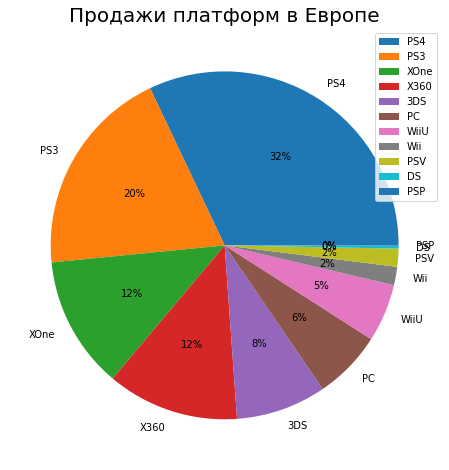

In [49]:
eu_sales_platform.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.0f%%')#построим круговую диаграмму
plt.title("Продажи платформ в Европе", size=20)
plt.ylabel("")
plt.show()

___Комментарии:___ По диаграмме мы видим, что в Европейских странах лидирует платформы PS4-32%, PS3-20%, XOne и X360 по 12%, 3DS-8%. Топ 5 платформ в Европе по продажам игр.

In [50]:
jp_sales_platform = data_3.pivot_table(
         index='platform',\
         values='jp_sales',\
         aggfunc='sum')\
        .sort_values(by='jp_sales',ascending=False)
#сделаем сводную таблицу в зависимости от продаж в Японии
display(jp_sales_platform.head())

,jp_sales
platform,
3DS,59.78
PS3,22.05
PSV,15.03
PS4,10.22
WiiU,10.21


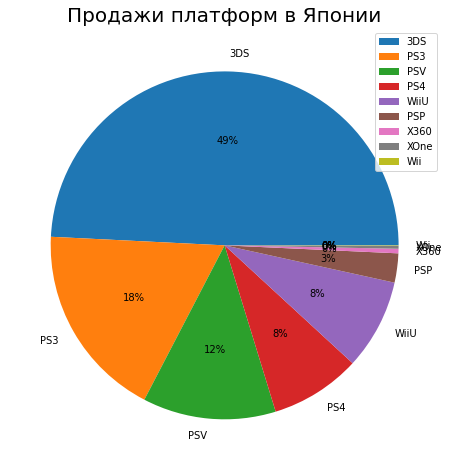

In [51]:
jp_sales_platform.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.0f%%')#построим круговую диаграмму
plt.title("Продажи платформ в Японии", size=20)
plt.ylabel("")
plt.show()

___Комментарии:___ Платформы которые лидируют в Японии, почти половина всех игр составляет 3DS-49%, затем второе место занимает платформа PS3-18%, PSV-12%. PS4-8% и на пятом месте WiiU-8%. Отличие по вкусам игр в отличие от других стран зависит от культуры страны, их предпочтений.

In [52]:
na_sales_platform = data_3.pivot_table(
         index='platform',\
         values='na_sales',\
         aggfunc='sum')\
        .sort_values(by='na_sales',ascending=False)
#сделаем сводную таблицу в зависимости от продаж в Японии
display(na_sales_platform.head())

,na_sales
platform,
PS4,87.25
X360,80.97
XOne,78.85
PS3,62.83
3DS,34.06


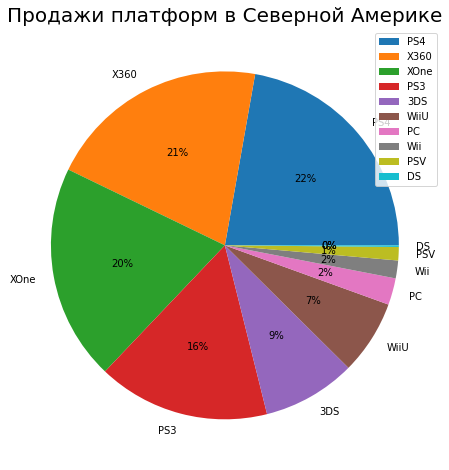

In [53]:
na_sales_platform.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.0f%%')#построим круговую диаграмму
plt.title("Продажи платформ в Северной Америке", size=20)
plt.ylabel("")
plt.show()

___Комментарии:___ Самые популярные платформы в Северной Америке PS4-22% и X360-21%, на третьем месте по продажам лидирует XOne 20%, затем PS3-16% b 3DS-9%.

In [54]:
other_sales_platform = data_3.pivot_table(
         index='platform',\
         values='other_sales',\
         aggfunc='sum')\
        .sort_values(by='other_sales',ascending=False)
#сделаем сводную таблицу в зависимости от продаж в Японии
display(other_sales_platform.head())

,other_sales
platform,
PS4,38.11
PS3,26.40
XOne,12.03
X360,11.99
3DS,5.64


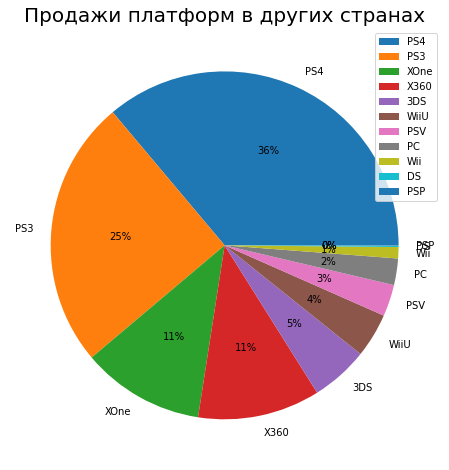

In [55]:
other_sales_platform.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.0f%%')#построим круговую диаграмму
plt.title("Продажи платформ в других странах", size=20)
plt.ylabel("")
plt.show()

___Комментарии:___ В других странах также как и в странах Европы и Северной Америке лидирует на первом месте PS4-36%. На втором месте платформа PS3-25%, XOne и X360 по 11%, 3DS-5%.

##### Топ пять жанров

In [56]:
genre_top = data_3.groupby(['genre'])\
      .agg({'total_sales':'sum'})\
      .sort_values(by='total_sales', ascending=False)#сгруппируем данные по жанрам и посчитаем суммы продаж
print('Самые популяные жанры:', genre_top.head())#выведим 5 строк

Самые популяные жанры:               total_sales
genre                    
Action             257.63
Shooter            171.01
Role-Playing       117.63
Sports             110.73
Misc                54.27


In [57]:
table_genre = data_3.pivot_table(
         index='genre',\
         values=['na_sales','eu_sales', 'jp_sales', 'other_sales'],\
         aggfunc='sum')\
        .sort_values(by=['na_sales','eu_sales', 'jp_sales', 'other_sales'],ascending=False)#сделаем сводную таблицу по жанрам и продажам по регионам
display(table_genre.head())# выведим топ-5 жанров

,eu_sales,jp_sales,na_sales,other_sales
genre,,,,
Action,107.45,33.42,116.76,34.13
Shooter,71.96,5.55,93.50,23.75
Sports,48.51,4.49,57.73,16.43
Role-Playing,32.69,44.43,40.51,10.08
Misc,19.38,8.16,26.73,5.95


___Комментарии:___ Самые популярные жанры игр: Action, Shooter, Role-Playing, Sports, Misc. Жанры различаются по продажам копий игр в разных странах в певую очередь тем, что различная численность начеления в представленных группах. Например в Северной америке 741млн.чел, а в Японии 126млн.чел., в Европе 533млн.чел примерно проживало в это время. Сильное влияние оказывает возврстная группа жанра и возможно цена игры. Возможно влияние оказывает социальная и эконочиская политика стран. 

In [58]:
eu_sales_genre = data_3.pivot_table(
         index='genre',\
         values='eu_sales',\
         aggfunc='sum')\
        .sort_values(by='eu_sales',ascending=False)
#сделаем сводную таблицу в зависимости от продаж в Японии
display(eu_sales_genre.head())

,eu_sales
genre,
Action,107.45
Shooter,71.96
Sports,48.51
Role-Playing,32.69
Misc,19.38


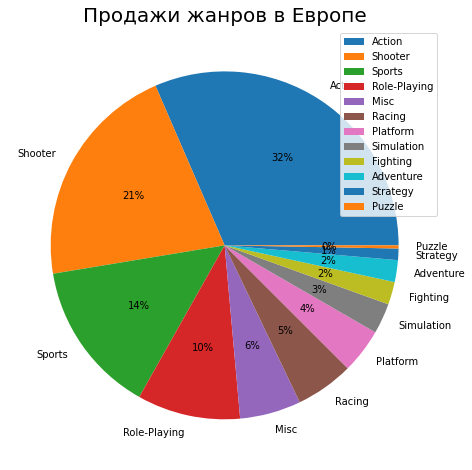

In [59]:
eu_sales_genre.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.0f%%')#построим круговую диаграмму
plt.title("Продажи жанров в Европе", size=20)
plt.ylabel("")
plt.show()

__Комментарии:___ Самые популярные жанры игр в Европе Action-32%, затем Shooter 21%, на третьем месте по продажам лидирует Sports-14%, затем Role-Playing-10%, и на пятом месте жанр Misc-6%. 

In [60]:
jp_sales_genre = data_3.pivot_table(
         index='genre',\
         values='jp_sales',\
         aggfunc='sum')\
        .sort_values(by='jp_sales',ascending=False)
#сделаем сводную таблицу в зависимости от продаж в Японии
display(jp_sales_genre.head())

,jp_sales
genre,
Role-Playing,44.43
Action,33.42
Misc,8.16
Fighting,6.90
Shooter,5.55


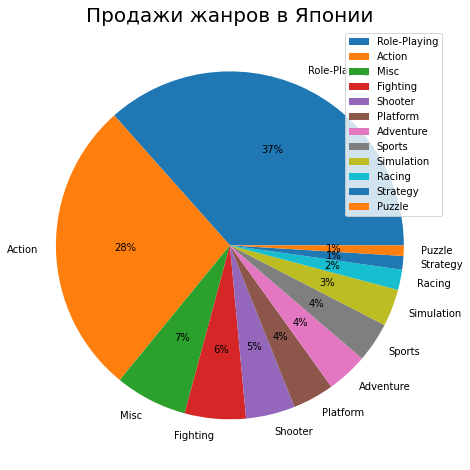

In [61]:
jp_sales_genre.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.0f%%')#построим круговую диаграмму
plt.title("Продажи жанров в Японии", size=20)
plt.ylabel("")
plt.show()

___Комментарии:___ Жанр Role-Playing занимает первое место по продажам в Японии - 37%, затем Action-28%, Misc-7%, на четвертом месте Fighting-6%, и на пятом месте жанр Shooter-5%.

In [62]:
na_sales_genre = data_3.pivot_table(
         index='genre',\
         values='na_sales',\
         aggfunc='sum')\
        .sort_values(by='na_sales',ascending=False)
#сделаем сводную таблицу в зависимости от продаж в Северной Америке
display(na_sales_genre.head())

,na_sales
genre,
Action,116.76
Shooter,93.50
Sports,57.73
Role-Playing,40.51
Misc,26.73


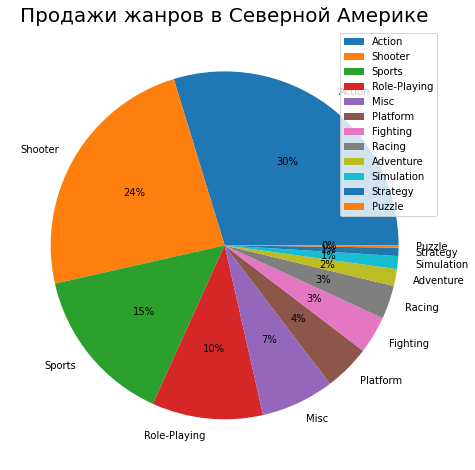

In [63]:
na_sales_genre.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.0f%%')#построим круговую диаграмму
plt.title("Продажи жанров в Северной Америке", size=20)
plt.ylabel("")
plt.show()

___Комментарии:___ На первом месте как и в Европе занимает жанр Action-30%. На втором месте жанр Shooter-24%, затем Sports-15%, на четвертом и пятом месте жанры Role-Playing и Misc 10% и 7% соответственно.	

In [64]:
other_sales_genre = data_3.pivot_table(
         index='genre',\
         values='other_sales',\
         aggfunc='sum')\
        .sort_values(by='other_sales',ascending=False)
#сделаем сводную таблицу в зависимости от продаж в других странах
display(other_sales_genre.head())

,other_sales
genre,
Action,34.13
Shooter,23.75
Sports,16.43
Role-Playing,10.08
Misc,5.95


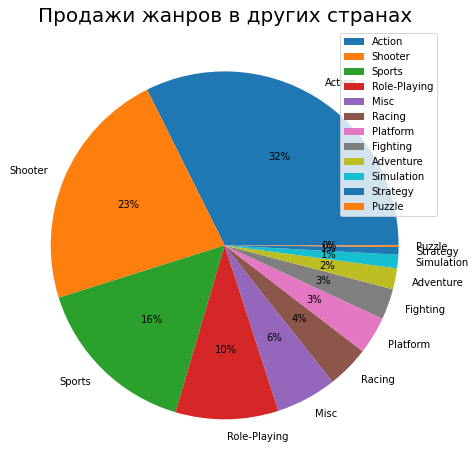

In [65]:
other_sales_genre.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.0f%%')#построим круговую диаграмму
plt.title("Продажи жанров в других странах", size=20)
plt.ylabel("")
plt.show()

___Комментарии___ В других странах по жанрам лидируют похожие жанры что и в Северной Америке. На первом месте жанр Action-32%, на втором месте Shooter-23%, на третьем месте Sports-16%, затем Role-Playing-10% и на пятом месте жанр Misc-6%.

##### Рейтинг ESRB

In [66]:
data_3.pivot_table(
         index='rating',\
         values=['na_sales','eu_sales', 'jp_sales', 'other_sales'],\
         aggfunc='sum')\
        .sort_values(by=['na_sales','eu_sales', 'jp_sales', 'other_sales'],ascending=False)
#с помощью сводной таблицы сгруппируем данные по каждому рейтингу в зависимости от продаж игр

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
M,128.78,12.91,149.54,42.10
uknow,71.44,70.73,80.89,21.18
E,69.75,14.07,71.08,19.52
E10+,38.88,5.44,50.43,11.51
T,32.16,18.32,40.84,11.18


___Комментарии:___ Самые высокие продажи игр в зависимости от рейтинга в Северной Америке, затем в Европейских странах, в других странах и в последюю очередь в Японии. Рассмотрим подробнее рейтинги в каждой группе стран.


In [67]:
eu_sales_rating = data_3.pivot_table(
         index='rating',\
         values='eu_sales',\
         aggfunc='sum')\
        .sort_values(by='eu_sales',ascending=False)
#сделаем сводную таблицу по рейтингам для Европы.
display(eu_sales_rating)

,eu_sales
rating,
M,128.78
uknow,71.44
E,69.75
E10+,38.88
T,32.16


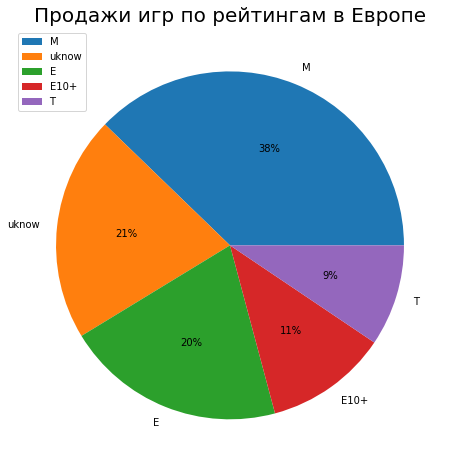

In [68]:
eu_sales_rating.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.0f%%')#построим круговую диаграмму
plt.title("Продажи игр по рейтингам в Европе", size=20)
plt.ylabel("")
plt.show()

___Комментарии:___ Самый высокий рейтинг по продажам в Европе составляет оценка "М" 38% продаж. На втором месте рейтинга составляет оценка "uknow", это значит что рейтинга не было, значит пользователи выбрали игры вне зависимоти от рейтинга. На третьем месте оценка "Е" 20%, затем "Е10+" и "Т", 11% и 9%.

In [69]:
jp_sales_rating = data_3.pivot_table(
         index='rating',\
         values='jp_sales',\
         aggfunc='sum')\
        .sort_values(by='jp_sales',ascending=False)
#сделаем сводную таблицу по рейтингам в Японии
display(jp_sales_rating)

,jp_sales
rating,
uknow,70.73
T,18.32
E,14.07
M,12.91
E10+,5.44


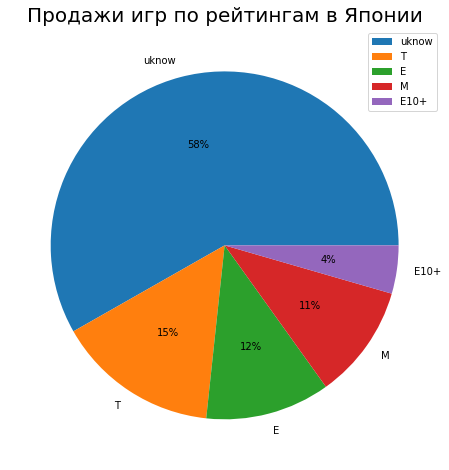

In [70]:
jp_sales_rating.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.0f%%')#построим круговую диаграмму
plt.title("Продажи игр по рейтингам в Японии", size=20)
plt.ylabel("")
plt.show()

___Комментарии:___ В Японии первое место занимают рейтинги "uknow" 58%, т.е. получается нет рейтинга, и продажи в этогй стране не зависят от рейтинга. Малые доли составляют рейтинг "Т" на втором месте, "Е" 12% на третьем месте, затем "M" и  "Е10+", 11% и 4%.

In [71]:
na_sales_rating = data_3.pivot_table(
         index='rating',\
         values='na_sales',\
         aggfunc='sum')\
        .sort_values(by='na_sales',ascending=False)
#сделаем сводную таблицу по рейтингам в Северной Америке
display(na_sales_rating)

,na_sales
rating,
M,149.54
uknow,80.89
E,71.08
E10+,50.43
T,40.84


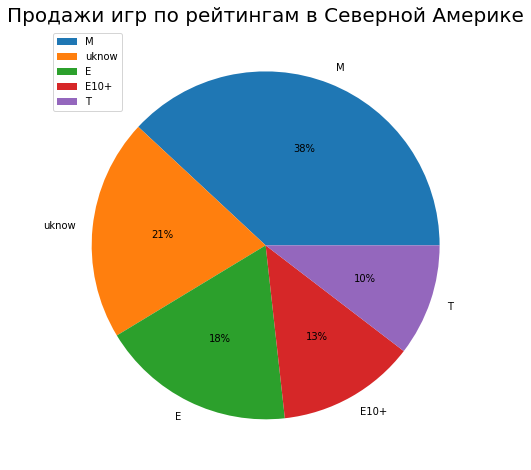

In [72]:
na_sales_rating.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.0f%%')#построим круговую диаграмму
plt.title("Продажи игр по рейтингам в Северной Америке", size=20)
plt.ylabel("")
plt.show()

___Комментарии:___ Самые высокие продажи в Северной Америке по рейтингу "M" 38%, 21% продаж от рейтингов не зависит, 18% принадлежит рейтингу "Е", рейтингу "Е10+" и "Т", 13% и 10% соответственно.

In [73]:
other_sales_rating = data_3.pivot_table(
         index='rating',\
         values='other_sales',\
         aggfunc='sum')\
        .sort_values(by='other_sales',ascending=False)
#сделаем сводную таблицу по рейтингу в других странах
display(other_sales_rating)

,other_sales
rating,
M,42.10
uknow,21.18
E,19.52
E10+,11.51
T,11.18


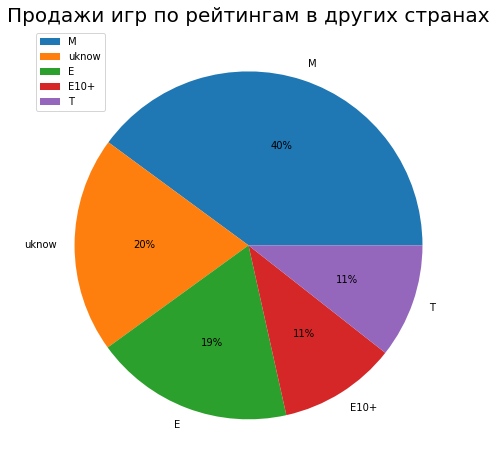

In [74]:
other_sales_rating.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.0f%%')#построим круговую диаграмму
plt.title("Продажи игр по рейтингам в других странах", size=20)
plt.ylabel("")
plt.show()

___Комментарии:___ Самые большие продажи по рейтингу "M" 40% в других странах, на втором месте 20% продажи от рейтингов не зависят, на третьем месте рейтинг "Е" 19%, и на рлследних местах рейтинги "E10+" и "T" по 11%. 

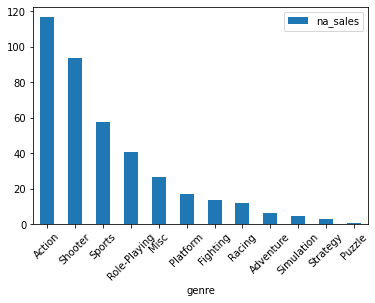

In [75]:
# код ревьюера
na_sales_genre.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

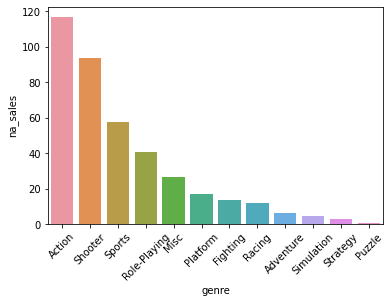

In [76]:
# код ревьюера

sns.barplot(data=na_sales_genre.reset_index(), x='genre', y='na_sales')
plt.xticks(rotation=45)
plt.show()

### Гипотезы

#### Сравнение платформ Xbox One и PC

```
H_0: Средние оценки (user_score) пользователей "XOne" = cредние оценки (user_score) пользователей "PC"`
H_1: Средние оценки (user_score) пользователей "XOne" ≠ cредние оценки (user_score) пользователей "PC"`
alpha = 0.05
```

In [77]:
results = st.ttest_ind(
    data_3.loc[data_3.platform == 'XOne', 'user_score'],\
    data_3.loc[data_3.platform == 'PC', 'user_score'],\
    nan_policy='omit')
alpha = 0.05
print(results.pvalue)
if results.pvalue<alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть гипотезу")

0.2827494983260732
Не получилось отвергнуть гипотезу


___Комментарии:___ Нулевая гипотеза сформирована на основе задания, рейтинги платформ одинакове, т.е. равны. Альтернативная гипотеза сформирована как двусторонняя, т.е. может быть больше или меньше. Выборочное среднее одной генеральной совокупности нужно сравнить с заданным значением. Здесь нужно сделать двусторонний тест для нулевой гипотезы, о том что значение выборки с независимыми наблюдениями будет равно среднему совокупности. Поэтому нам подойдет st.ttest_ind - равенство средних двух совокупностей. equal_var= True  по умочанию, так выборки одинковые. alpha = 0.05, так как значений в выборке мало. В результате мы получили средние пользовательские оценки равны при проверке гипотезы.

#### Сравнение жанров Action и Sports

```
H_0: Средние оценки (user_score) пользователей жанра "Action" = cредним оценкам (user_score) пользователей жанра "Sports"`
H_1: Средние оценки (user_score) пользователей "Action" и cредние оценки (user_score) пользователей "Sports" разные`
alpha = 0.05
```

In [78]:
results = st.ttest_ind(
    data_3.loc[data_3['genre'] == 'Action', 'user_score'],\
    data_3.loc[data_3['genre'] == 'Sports', 'user_score'],\
    nan_policy='omit')
alpha = 0.05
print(results.pvalue)
if results.pvalue<alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть гипотезу")

4.157989291674393e-26
Отвергаем нулевую гипотезу


__Комментарии:__ Нулевая гипотеза по жанрам равна, потому что в определении написано, что жанры разные, значит в нулевой гипотезе, проверяем что жанры равны. Альтернативная гипотеза двусторонняя, вероятность уровня значимости приходится либо на одну сторону, либо на другую. Использовали также st.ttest_ind так как она подходит для двух равных совокупностей, совокупности не зависят друг от друга, выборочное среднее в нормальном распределении. В результате мы получили что отвергнута нулевая гипотеза, значит пользовательские оценки жанров Action и Sports разные. 

###### Общий вывод

Мы изучили исторические данные компьютерных игр, которые нам позволили определить закономерности для успешной продажи игр на 2017 год. Мы провели исследовательский анализ данных, и узнали, что выпуск приходился на 200-2016гг., пик приходился на 2008г.- 1440 игр или 9%. Жизненный цикл платформы в среднем 8-10 лет, самые популярные из них: PS2, DS, PS3, Wii, X360, PSP, PS, PC, XB, GBA. Мы анализировали топ 5 платформ распределенных по годам и выявили, что рост продаж приходится на первую половину жизни 3-4 года. Для более узкого анализа мы взяли актуальный период топ 5 платформ на пике продаж - 2013,2014,2015 годы. Самая высокая продаваемая платформа оказалась PS4 0,91 млн.игр, самая низко продаваемая PSP 0,05 млн. игр. Мы исследовали лидирующую платформу PS4, обобщили выводы к другим платформам и выявили закономерность, что продажи игр зависят от оценок критиков. В свою очередь оценки критиков зависят от оценок пользователей игр. Оценки пользователей не влияют на продажи платформ. Затем мы выявили самые прибыльные жанры, оказалось самые высокие продажи были по жанру Scooter - 1,22 млн.игр, а самые низкие продажи по жанру Adventure - 0,1 млн. игр. Для успешной работы интернет-магазина "Стримчик" мы создали портрет для каждого сегмента пользователей. Для этого мы определили топ 5 платформ - PS4, PS3, X360, XDS, XOne. А также топ 5 жанров - Action, Shooter, Role-Playing, Sports, Misc.   
<code> Для Европейских стран </code>
- успешные платформы PS4-32%, PS3-20%, XOne-12%
- Успешные жанры Action-32%, Scotter-21%, Sports-14%
- Рейтинги по оценкам M-38%, 21% не зависят от рейтинга  
<code> Для Японии </code>
- успешные платформы 3DS-49%, PS3-18%, PSV-12%
- Успешные жанры Role-Playing-37%, Action-28%, Misc-7%
- Рейтинги по оценкам 58% не вдияет на рейтинг, Т-12%, Е-12%  
<code> Для Северной Америки </code>
- успешные платформы PS4-22%, X360-11%, XOne-20%
- Успешные жанры Action-30%, Scotter-24%, Sports-15%
- Рейтинги по оценкам M-38%, 21% не зависят от рейтинга  
<code> Для других стран </code>
- успешные платформы PS4-36%, PS3-25%, XOne-11%
- Успешные жанры Action-32%, Scotter-23%, Sports-16%
- Рейтинги по оценкам M-40%, 20% не зависят от рейтинга